In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost

<div dir="rtl" style="text-align: right;">
<h3> کتابخانه های مورد استفاده
</div>


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


<div dir="rtl" style="text-align: right;">
<h3>خواندن و نمایش داده‌ها</h3>
<p>در این بخش، داده‌های مجموعه بهره‌وری انرژی را از فایل پیوست می‌خوانیم و پنج سطر اول آن را نمایش می‌دهیم.</p>
</div>


In [2]:
# Load the dataset
data = pd.read_csv('energy_efficiency_data.csv')

# Display the first few rows of the dataset
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<div dir="rtl" style="text-align: right;">
<h3>توصیف داده‌ها</h3>
<p>در این بخش، آماره‌های توصیفی مجموعه داده را به دست می‌آوریم که شامل میانگین، انحراف معیار، کمینه، بیشینه و چارک‌های داده‌ها می‌باشد.</p>
</div>


In [3]:
# Generate descriptive statistics of the dataset

data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<div dir="rtl" style="text-align: right;">
<h3>بررسی داده‌های گمشده</h3>
<p>در این بخش، وجود مقادیر گمشده در مجموعه داده بررسی می‌شود و تعداد مقادیر گمشده برای هر ستون چاپ می‌شود.</p>
</div>


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


<div dir="rtl" style="text-align: right;">
<h3>تحلیل توزیع داده‌ها</h3>
<p>در این بخش، نمودارهای هیستوگرام برای هشت ستون اول مجموعه داده ترسیم می‌شود تا توزیع داده‌ها و چگالی (KDE) آنها را تحلیل کنیم.</p>
</div>


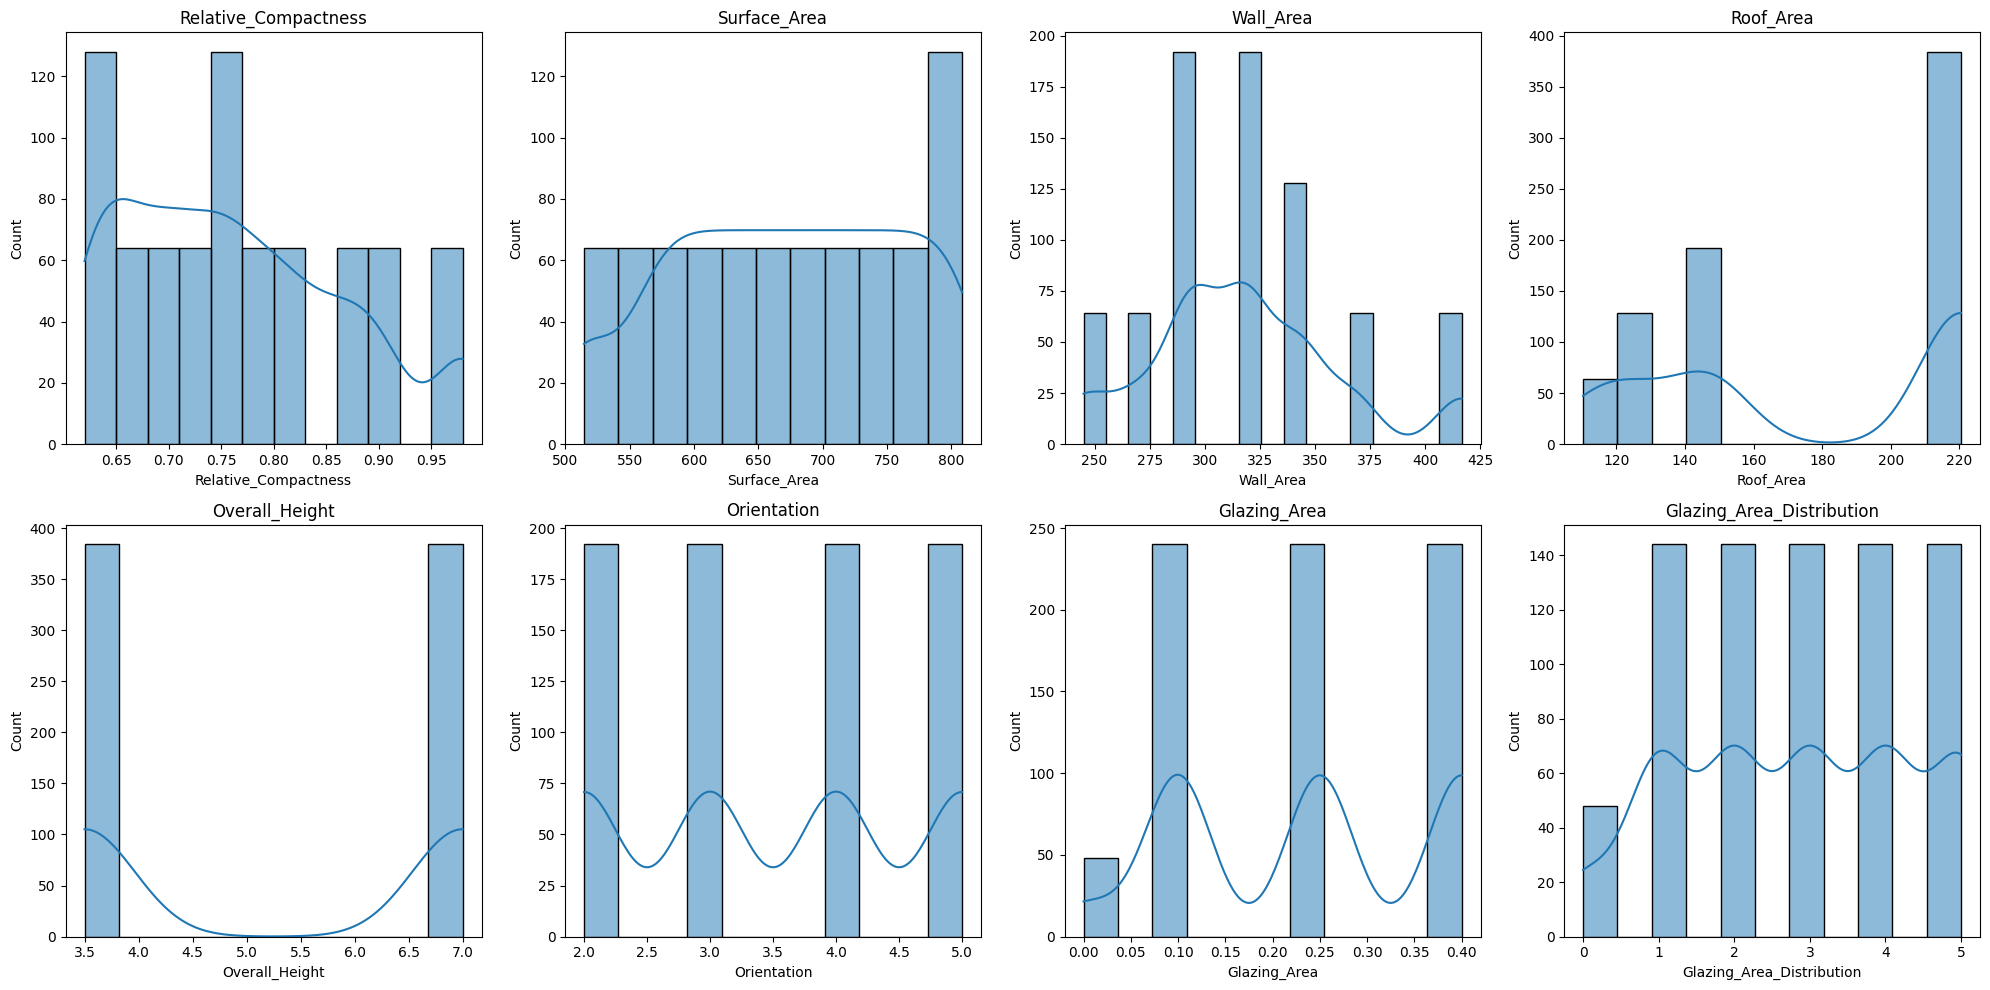

In [7]:
# Create histograms for the first 8 columns in the dataset
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Plot histograms with KDE for each column
for i, column in enumerate(data.columns[:8]):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right;">
<h3>ماتریس همبستگی</h3>
<p>در این بخش، ماتریس همبستگی برای مجموعه داده محاسبه می‌شود و نقشه حرارتی (heatmap) آن ترسیم می‌گردد تا همبستگی بین ویژگی‌های مختلف مشاهده شود.</p>
</div>


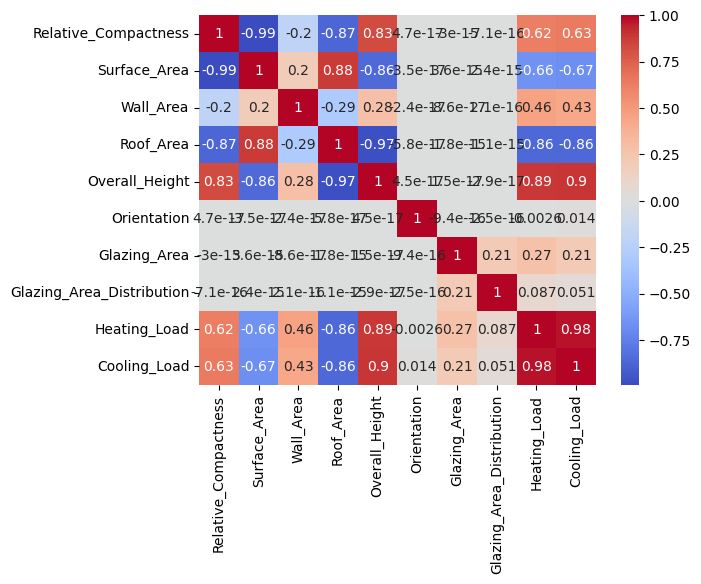

In [9]:
# Calculate the correlation matrix for the dataset
corr_matrix = data.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


<div dir="rtl" style="text-align: right;">
<h3>تحلیل نمودارهای جعبه‌ای</h3>
<p>در این بخش، نمودارهای جعبه‌ای (box plot) برای هشت ستون اول مجموعه داده ترسیم می‌شود تا توزیع و نقاط پرت داده‌ها مشاهده شود.</p>
</div>


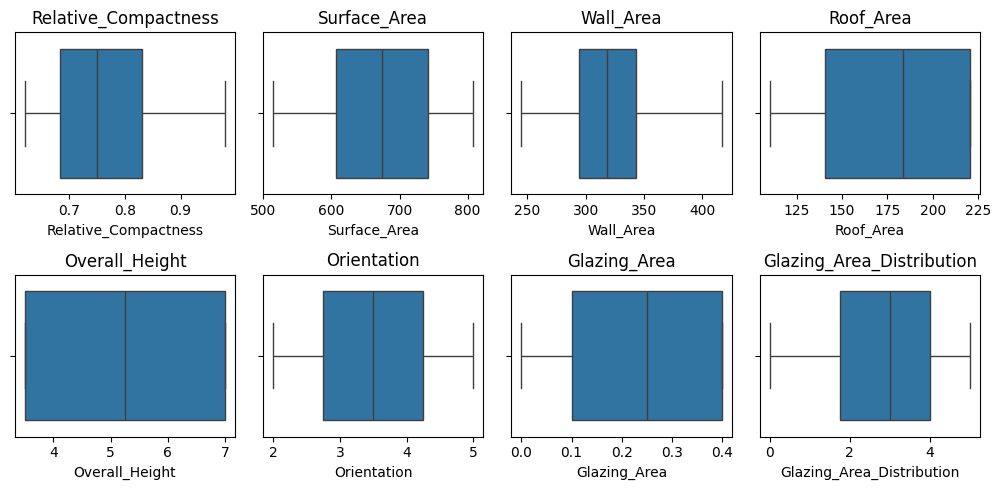

In [14]:
# Create box plots for the first 8 columns in the dataset
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.flatten()

# Plot box plots for each column
for i, column in enumerate(data.columns[:8]):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right;">
<h3>حذف ستون‌های غیرضروری</h3>
<p>در این بخش، ستون‌های غیرضروری شامل 'Surface_Area'، 'Roof_Area' و 'Heating_Load' از مجموعه داده حذف می‌شوند.</p>
</div>


In [22]:
# Drop unnecessary columns from the dataset
data_cleaned = data.drop(columns=['Surface_Area', 'Roof_Area', 'Heating_Load'])

# Display the cleaned dataset
data_cleaned

,Relative_Compactness,Wall_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Cooling_Load
0,0.98,294.0,7.0,2,0.0,0,21.33
1,0.98,294.0,7.0,3,0.0,0,21.33
2,0.98,294.0,7.0,4,0.0,0,21.33
3,0.98,294.0,7.0,5,0.0,0,21.33
4,0.90,318.5,7.0,2,0.0,0,28.28
...,...,...,...,...,...,...,...
763,0.64,343.0,3.5,5,0.4,5,21.40
764,0.62,367.5,3.5,2,0.4,5,16.88
765,0.62,367.5,3.5,3,0.4,5,17.11
766,0.62,367.5,3.5,4,0.4,5,16.61


<div dir="rtl" style="text-align: right;">
<h3>استانداردسازی داده‌ها</h3>
<p>در این بخش، داده‌ها استانداردسازی می‌شوند. ابتدا ویژگی‌ها و متغیر هدف از هم جدا می‌شوند و سپس ویژگی‌ها با استفاده از StandardScaler استانداردسازی می‌شوند.</p>
</div>


In [27]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Separate features and target variable
X = data_cleaned.drop(columns=['Cooling_Load'])
y = data_cleaned['Cooling_Load']

# Apply standard scaling to the features
data_scaled_x = scaler.fit_transform(X)

# Print the scaled features
print(data_scaled_x)


[[ 2.04177671 -0.56195149  1.         -1.34164079 -1.76044698 -1.81457514]
 [ 2.04177671 -0.56195149  1.         -0.4472136  -1.76044698 -1.81457514]
 [ 2.04177671 -0.56195149  1.          0.4472136  -1.76044698 -1.81457514]
 ...
 [-1.36381225  1.12390297 -1.         -0.4472136   1.2440492   1.41133622]
 [-1.36381225  1.12390297 -1.          0.4472136   1.2440492   1.41133622]
 [-1.36381225  1.12390297 -1.          1.34164079  1.2440492   1.41133622]]


<div dir="rtl" style="text-align: right;">
<h3>تقسیم داده‌ها به مجموعه آموزش و آزمون</h3>
<p>در این بخش، داده‌ها به مجموعه‌های آموزش و آزمون با نسبت 80/20 تقسیم می‌شوند. همچنین تعداد نمونه‌های موجود در هر مجموعه چاپ می‌شود.</p>
</div>


In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in the test set and the training set
print(X_test.shape[0])
print(X_train.shape[0])


154
614


<div dir="rtl" style="text-align: right;">
<h3>آموزش و ارزیابی مدل شبکه عصبی (MLP)</h3>
<p>در این بخش، مدل شبکه عصبی (MLP) آموزش داده می‌شود و روی داده‌های آزمون پیش‌بینی انجام می‌شود. سپس مقادیر MAE و RMSE محاسبه و چاپ می‌شوند.</p>
</div>


In [43]:
# Initialize the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Calculate MAE and RMSE for the MLP model
mae = mean_absolute_error(y_test, y_pred_mlp)
rmse = mean_squared_error(y_test, y_pred_mlp, squared=False)

# Print the MAE and RMSE
print(f'Neural Network (MLP) - MAE: {mae}, RMSE: {rmse}')


Neural Network (MLP) - MAE: 2.903109277895018, RMSE: 3.7692115382552465


e:\DataScience\Project\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<div dir="rtl" style="text-align: right;">
<h3>آموزش و ارزیابی مدل جنگل تصادفی</h3>
<p>در این بخش، مدل جنگل تصادفی آموزش داده می‌شود و روی داده‌های آزمون پیش‌بینی انجام می‌شود. سپس مقادیر MAE و RMSE محاسبه و چاپ می‌شوند.</p>
</div>


In [46]:
# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate MAE and RMSE for the Random Forest model
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# Print the MAE and RMSE
print(f'Random Forest - MAE: {mae}, RMSE: {rmse}')


Random Forest - MAE: 1.0648337662337661, RMSE: 1.707626691084412


e:\DataScience\Project\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<div dir="rtl" style="text-align: right;">
<h3>آموزش و ارزیابی مدل  XGBoost</h3>
<p>در این بخش، مدل xgboost آموزش داده می‌شود و روی داده‌های آزمون پیش‌بینی انجام می‌شود. سپس مقادیر MAE و RMSE محاسبه و چاپ می‌شوند.</p>
</div>


In [47]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'XGBoost - MAE: {mae}, RMSE: {rmse}')

XGBoost - MAE: 0.4396061146723759, RMSE: 0.8094383190341791


e:\DataScience\Project\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<div dir="rtl" style="text-align: right;">
<h3>ترسیم نمودار مقادیر واقعی و مقادیر پیش‌بینی</h3>
</div>


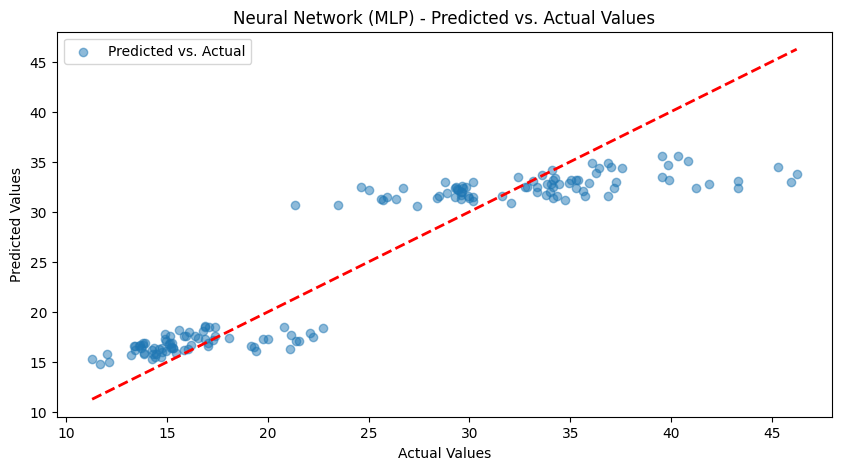

In [38]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_mlp, alpha=0.5, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network (MLP) - Predicted vs. Actual Values')
plt.legend()
plt.show()

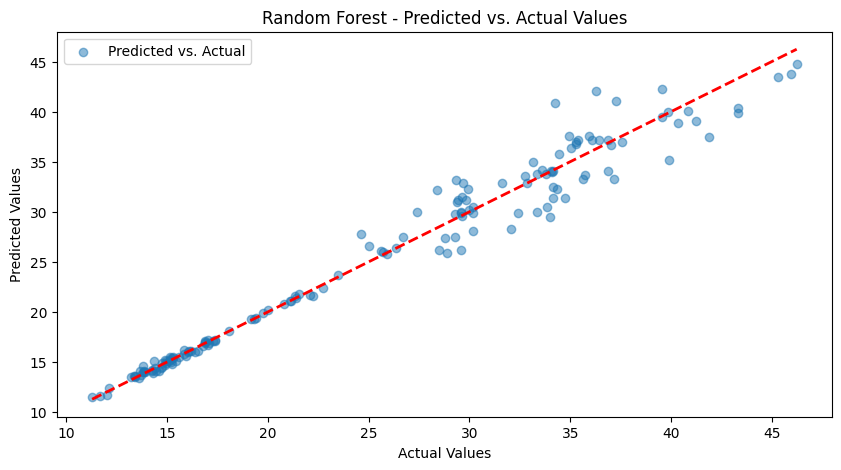

In [48]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest - Predicted vs. Actual Values')
plt.legend()
plt.show()

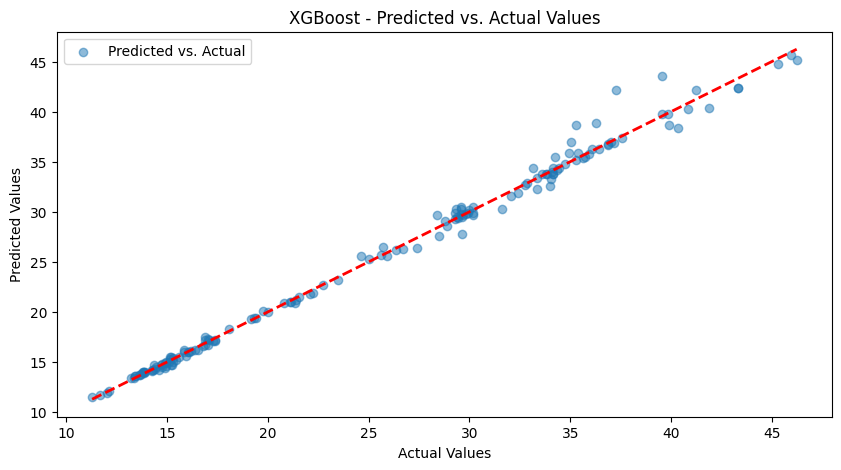

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost - Predicted vs. Actual Values')
plt.legend()
plt.show()